# **3.0 - Modelling and Evaluating**: Mildew Detection Project

---

## Objectives

* To Answer Business Requirement 02:
    * **The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.**
    * Develop a machine learning model that can accurately classify cherry leaves as either healthy or affected by powdery mildew based on image data.

## Inputs

* `inputs/cherry_leaves_dataset/cherry-leaves/train`
* `inputs/cherry_leaves_dataset/cherry-leaves/test`
* `inputs/cherry_leaves_dataset/cherry-leaves/validation`

## Outputs

* Model capable of predicting whether a cherry leaf is healthy or contains powdery mildew.
* Mean and variability of images per label plot.
* Plot to distinguish the contrast between mildew-infected and healthy cherry leaf images.
* Code and data that address **Business Requirement 02** and can be used to build an image montage on the Streamlit dashboard.

## Additional Comments

* No Comments.




---

## 3.1 - Set Up

---

### 3.1.1 - Import Regular Packages

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

### 3.1.2 - Set Working Directory

In [15]:
cwd= os.getcwd()

In [16]:
os.chdir('/workspace/Mildew-Detection-CL')
print("You set a new current directory")

You set a new current directory


In [17]:
work_dir = os.getcwd()
work_dir

'/workspace/Mildew-Detection-CL'

### 3.1.3 - Set Input Directories

Set the paths for **Train**, **Validation**, and **Test**

In [18]:
data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'

train_path = data_dir + '/train'

valid_path = data_dir + '/validation'

test_path = data_dir + '/test'

### 3.1.4 - Set Output Directory

In [19]:
version = 'v2'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


### 3.1.5 - Set Labels

In [20]:
labels = os.listdir(train_path)

print(f"Project Labels: {labels}")

Project Labels: ['healthy', 'powdery_mildew']


### 3.1.6 - Set Image Shape

In [21]:
import joblib

image_shape = joblib.load(filename=f"outputs/image_shape.pkl")
image_shape

(256, 256, 3)

---

## 3.2 - Number of images in **Train**, **Test** & **Validation** data

---

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




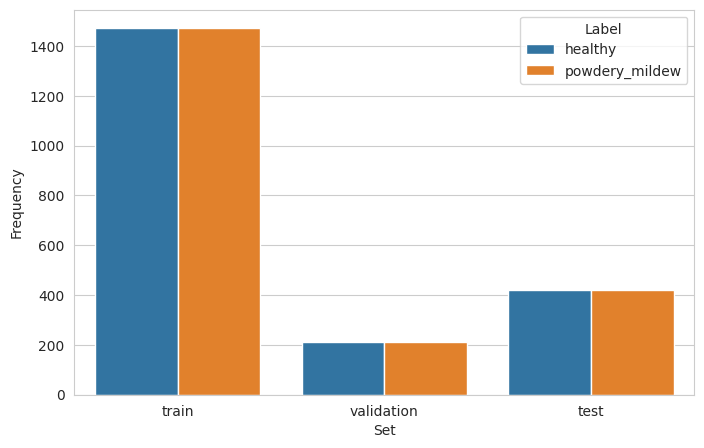

In [22]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

## 3.3 - Image Data Augmentation

---

### 3.3.1 - ImageDataGenerator

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

---

#### 3.3.1.1 - Initialize ImageDataGenerator

In [24]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

#### 3.3.1.2 - Augment **Training** image dataset

In [25]:
batch_size = 20 

train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

#### 3.3.1.3 - Augment **Validation** image dataset

In [27]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(valid_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

#### 3.3.1.3 - Augment **Test** image dataset

In [28]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

### 3.3.2 - Plot augmented **Training** image

(20, 256, 256, 3)


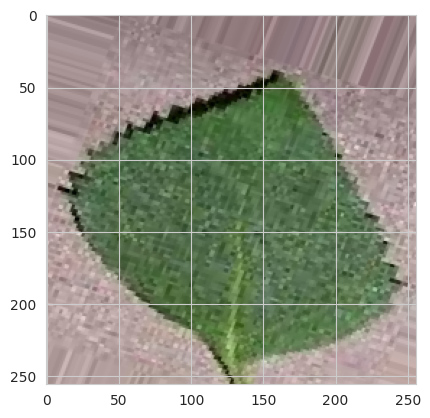

(20, 256, 256, 3)


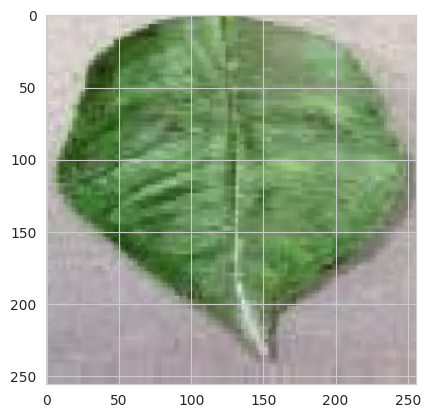

(20, 256, 256, 3)


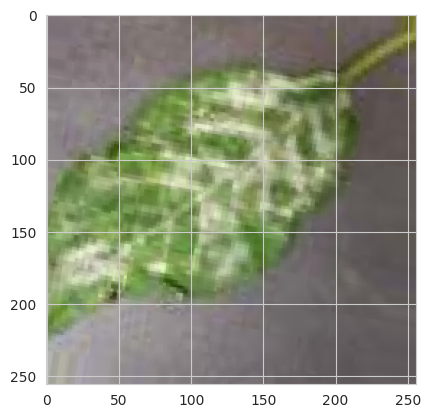

In [29]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

### 3.3.3 - Plot augmented **Validation** and **Test** images

(20, 256, 256, 3)


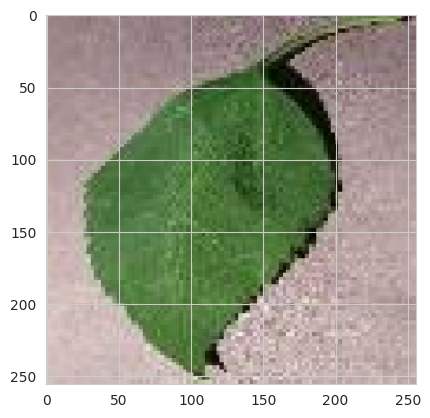

(20, 256, 256, 3)


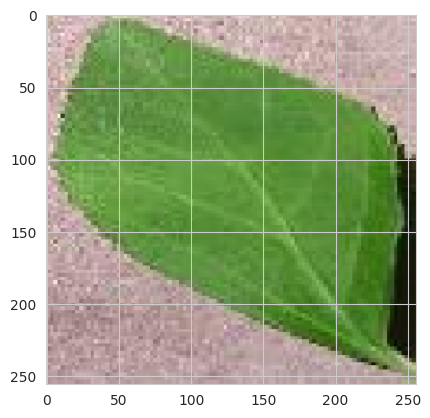

(20, 256, 256, 3)


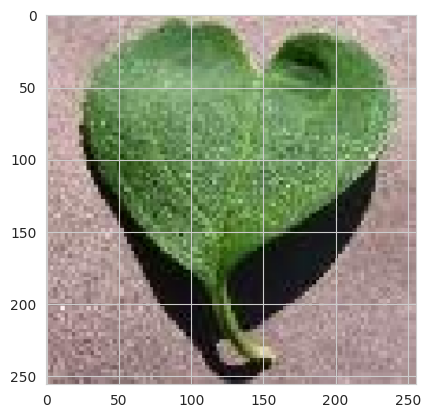

In [30]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

(20, 256, 256, 3)


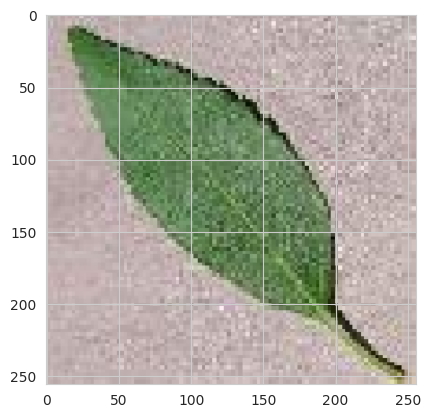

(20, 256, 256, 3)


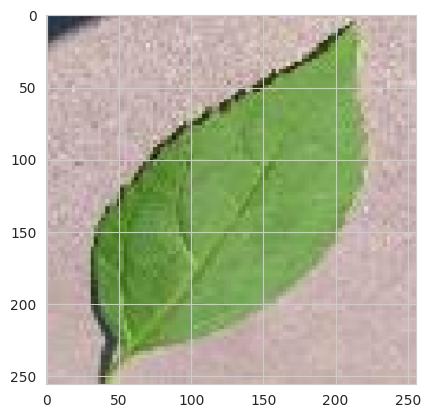

(20, 256, 256, 3)


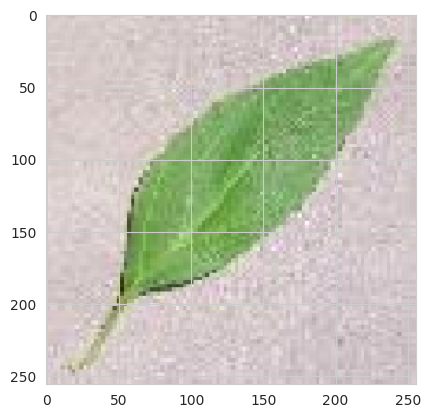

In [31]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

### 3.3.4 - Save class_indices

In [32]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v2/class_indices.pkl']

---

## 3.4 - Model Creation

---

### 3.4.1 - ML Model

---

#### 3.4.1.1 - Import Model Packages

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

#### 3.4.1.3 - Model

In [47]:
def create_tf_model(input_shape=(100, 100, 3)):
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model


#### 3.4.1.4 - Model Summary

In [48]:
input_shape = (image_shape[0], image_shape[1], 3)
model = create_tf_model(input_shape=input_shape)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 57600)            

#### 3.4.1.5 - Early Stopping

In [49]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

### 3.4.2 - Fit Model for Model Training

In [50]:
model.fit(train_set,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1)

Epoch 1/25
147/147 [==============================] - 287s 2s/step - loss: 0.3434 - accuracy: 0.8365 - val_loss: 0.0911 - val_accuracy: 0.9762
Epoch 2/25
147/147 [==============================] - 283s 2s/step - loss: 0.1880 - accuracy: 0.9316 - val_loss: 0.0527 - val_accuracy: 0.9810
Epoch 3/25
147/147 [==============================] - 284s 2s/step - loss: 0.1026 - accuracy: 0.9641 - val_loss: 0.0447 - val_accuracy: 0.9810
Epoch 4/25
147/147 [==============================] - 282s 2s/step - loss: 0.0672 - accuracy: 0.9774 - val_loss: 0.0150 - val_accuracy: 0.9952
Epoch 5/25
147/147 [==============================] - 283s 2s/step - loss: 0.0425 - accuracy: 0.9870 - val_loss: 0.0077 - val_accuracy: 0.9952
Epoch 6/25
147/147 [==============================] - 286s 2s/step - loss: 0.0533 - accuracy: 0.9808 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/25
147/147 [==============================] - 284s 2s/step - loss: 0.0317 - accuracy: 0.9891 - val_loss: 0.1750 - val_accuracy: 0.9310

### 3.4.3 - Save Model

In [51]:
model.save('outputs/v2/mildew_detector_model.h5')

---

## 3.5 - Model Performance

---

### 3.5.1 - Model Learning Curve

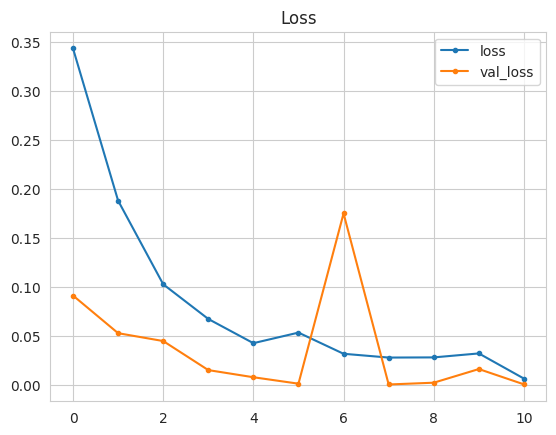

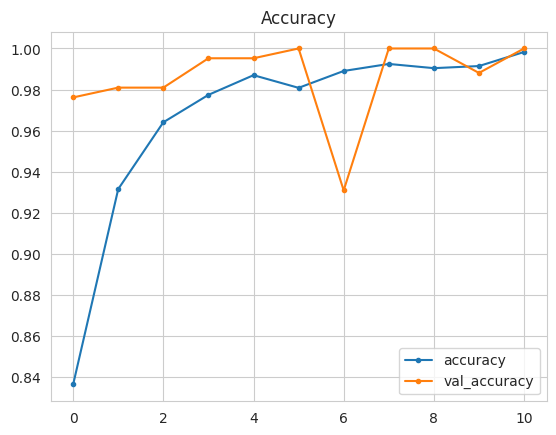

In [52]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

### 3.5.2 - Model Evaluation

Load saved model

In [54]:
from keras.models import load_model
model = load_model('outputs/v2/mildew_detector_model.h5')

Evaluate model on test set

In [55]:
evaluation = model.evaluate(test_set)

43/43 [==============================] - 19s 426ms/step - loss: 6.8839e-04 - accuracy: 1.0000


### 3.5.3 - Save evaluation pickle

In [56]:
joblib.dump(value=evaluation,
            filename=f"outputs/v2/evaluation.pkl")

['outputs/v2/evaluation.pkl']

## 3.6 - Predict on New Data

---

Load a random image as PIL

Image shape: (256, 256), Image mode: RGB


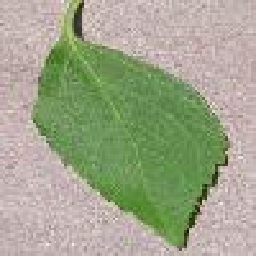

In [64]:
from tensorflow.keras.preprocessing import image

pointer = 66
label = labels[0]

target_size = (256, 256)

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=target_size, color_mode='rgb')

print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image


Convert image to array and prepare for prediction

In [65]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255.0 
print(my_image.shape)

(1, 256, 256, 3)


Predict class probabilities

In [66]:
model_file_path = 'outputs/v2/mildew_detector_model.h5'
model = load_model(model_file_path)

pred_proba = model.predict(my_image)[0, 0]

target_map = {0: 'healthy', 1: 'powdery_mildew'}

pred_class = target_map[int(pred_proba > 0.5)]

if pred_class == 'healthy':
    pred_proba = 1 - pred_proba

print(f"Predicted Probability: {pred_proba:.4f}")
print(f"Predicted Class: {pred_class}")

Predicted Probability: 1.0000
Predicted Class: healthy


## 3.7 - Conclusion

---

This notebook has achieved the following:

* **Dataset Preparation**:
  - Set up paths and directory structures for training, validation, and test datasets.
  - Ensured data integrity by verifying and processing the dataset.

* **Data Augmentation**:
  - Applied various augmentation techniques to enhance the training dataset, including rotation, shifting, and flipping.

* **Model Creation and Training**:
  - Developed a Convolutional Neural Network (CNN) model to classify cherry leaves as healthy or infected with powdery mildew.
  - Trained the model using augmented training data and validated its performance using the validation set.

* **Model Evaluation**:
  - Evaluated the trained model on the test set and saved performance metrics.
  - Generated learning curves to analyze the model's training and validation losses and accuracies.

* **Predictions**:
  - Implemented functionality to predict the class of new cherry leaf images, providing the probability and classification result.

These steps address **Business Requirement 02**, focusing on predicting whether a cherry leaf is healthy or affected by powdery mildew. The resulting model and visualizations can be leveraged for further analysis and integration into interactive dashboards, supporting accurate and effective disease detection in cherry leaves.
